In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

2026-02-14 06:32:26.695851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771050746.930957      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771050746.997608      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771050747.565467      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771050747.565532      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771050747.565537      55 computation_placer.cc:177] computation placer alr

In [5]:
X , y = make_moons(n_samples = 250, noise = 0.05 , random_state = 42)

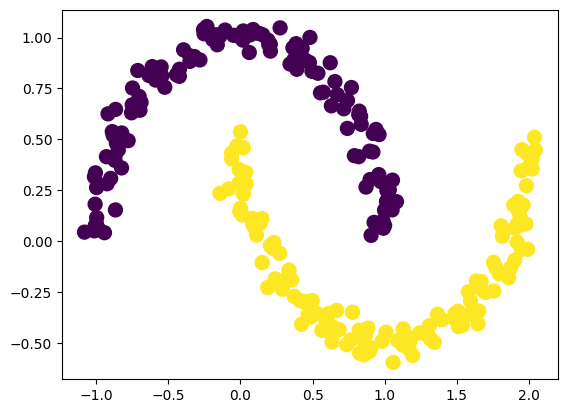

In [6]:
plt.scatter(X[: , 0] , X[: , 1] , c = y , s = 100)

In [8]:
model = Sequential()
model.add(Dense(10 , activation = 'sigmoid' , input_dim = 2))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(10 , activation = 'sigmoid'))
model.add(Dense(1 , activation = 'sigmoid'))

In [9]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [10]:
model.get_weights()[0]

array([[ 0.00093567,  0.46900135, -0.67934144, -0.6600636 , -0.3083293 ,
         0.26408678, -0.20563209,  0.09051222,  0.34945148,  0.7003172 ],
       [ 0.33173126, -0.34201998,  0.5506943 , -0.60495764, -0.42832696,
        -0.38843006,  0.30946165,  0.30991608, -0.3191779 ,  0.20788378]],
      dtype=float32)

In [11]:
old_weights = model.get_weights()[0]

In [13]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [14]:
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4914 - loss: 0.7389
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4890 - loss: 0.7278 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4920 - loss: 0.7165 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4931 - loss: 0.7096 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5038 - loss: 0.7020 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5004 - loss: 0.6996 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4947 - loss: 0.6980 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4973 - loss: 0.6954 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5205 - loss: 0.6919 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4960 - loss: 0.6936 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5033 - loss: 0.6930 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4459 - loss

In [16]:
new_weights = model.get_weights()[0]

In [17]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [18]:
gradient = (old_weights - new_weights)/0.001
percent_change = abs(100* (old_weights - new_weights)/old_weights)

In [19]:
gradient

array([[ 165.27206  , -156.61472  ,  248.85963  ,   10.168432 ,
          -3.4995375,   77.68401  ,  -70.52167  ,  239.17975  ,
         262.9761   ,  -89.44606  ],
       [-125.50574  ,  141.30925  , -256.76065  ,   -7.497608 ,
           4.1109324,  -70.76451  ,   60.64187  , -190.35327  ,
        -219.98625  ,   83.6978   ]], dtype=float32)

In [20]:
percent_change

array([[1.7663430e+04, 3.3393234e+01, 3.6632484e+01, 1.5405232e+00,
        1.1350000e+00, 2.9416094e+01, 3.4295071e+01, 2.6425137e+02,
        7.5253967e+01, 1.2772222e+01],
       [3.7833561e+01, 4.1316086e+01, 4.6624897e+01, 1.2393609e+00,
        9.5976502e-01, 1.8218084e+01, 1.9595924e+01, 6.1420910e+01,
        6.8922775e+01, 4.0261826e+01]], dtype=float32)

In [21]:
old_weights

array([[ 0.00093567,  0.46900135, -0.67934144, -0.6600636 , -0.3083293 ,
         0.26408678, -0.20563209,  0.09051222,  0.34945148,  0.7003172 ],
       [ 0.33173126, -0.34201998,  0.5506943 , -0.60495764, -0.42832696,
        -0.38843006,  0.30946165,  0.30991608, -0.3191779 ,  0.20788378]],
      dtype=float32)

In [22]:
new_weights

array([[-0.1643364 ,  0.6256161 , -0.9282011 , -0.67023206, -0.30482978,
         0.18640277, -0.13511042, -0.14866754,  0.08647537,  0.7897633 ],
       [ 0.457237  , -0.48332924,  0.80745494, -0.59746003, -0.4324379 ,
        -0.31766555,  0.24881978,  0.50026935, -0.09919164,  0.12418597]],
      dtype=float32)